# Stock Analysis with Moving Average (MA) Crossover Strategies

There are various moving average models that are used to follow trends and make market predictions, and in this project I will implement the Simple Moving Average (SMA) Crossover and the Exponential Moving Average (EMA) Crossover.

As the first step, import the necessary libraries for this project to work.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

Then I yf.download function to get the stock data for the specified ticker, start and end dates.

In [28]:
# This function takes 3 parameters in string and returns a dataframe.
# 1st parameter is the ticker (eg.)= 'AAPL', 2nd is the start date 
# and the 3rd is the end date. (Date format = 'yyyy-mm-dd')
    
stock_data = yf.download('AAPL','2020-01-01','2022-01-01')

[*********************100%***********************]  1 of 1 completed


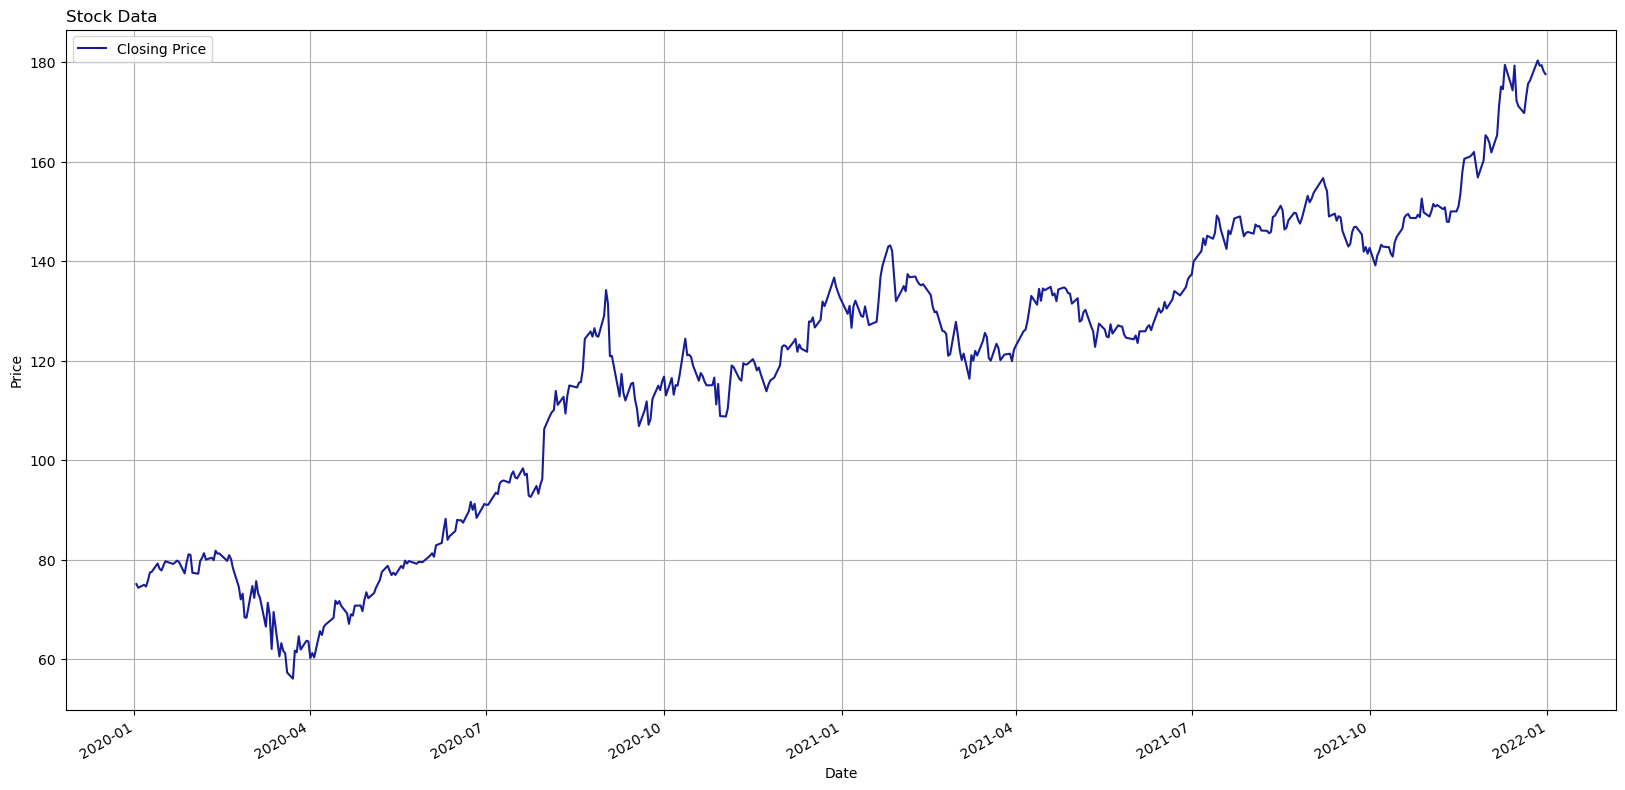

In [29]:
# Initialising the plot figure
fig_stock_data = plt.figure(figsize = (20,10))
ax1 = fig_stock_data.add_subplot(ylabel='Price')

# Plotting the closing price the stock
stock_data['Close'].plot(color = '#171d96', label = 'Closing Price')
plt.title("Stock Data", loc = 'left')
plt.legend()
plt.grid()
plt.show()

### Defining MA Strategies

Here the Moving Average strategies are defined and a new data frame is created including the signals of best times to buy and sell the stock.

In the Moving Average (MA) Crossover strategy two periods are specified, one for short term and the other for long term. In this project these terms are in 'number of days' where the stock market is active. 

The buy signal is displayed when the short term MA crosses above the long term MA. This is an indication of a up-shifting trend. The sell signal is displayed when the short term MA crosses below the long term MA. This is an indication of a down-shifting trend.

In [30]:
# Setting time periods for long and short moving averages
short_term = 20
long_term = 50

# Initialising the `signal` DataFrame for indicators
signal = pd.DataFrame(index=stock_data.index)
signal['indicator_SMA'] = 0.0 
signal['indicator_EMA'] = 0.0

# Creating Short Simple Moving Average 
signal['short_SMA'] = stock_data['Close'].rolling(window=short_term, min_periods=1, center=False).mean()

# Creating Long Simple Moving Average 
signal['long_SMA'] = stock_data['Close'].rolling(window=long_term, min_periods=1, center=False).mean()

# Short Exponential Moving Average
signal['short_EMA'] = stock_data['Close'].ewm(span=short_term,adjust=False).mean()

# Long Exponential Moving Average
signal['long_EMA'] = stock_data['Close'].ewm(span=long_term,adjust=False).mean()

# Creating signals
signal['indicator_SMA'] = np.where(signal['short_SMA'] > signal['long_SMA'], 1.0, 0.0)   
signal['indicator_EMA'] = np.where(signal['short_EMA'] > signal['long_EMA'], 1.0, 0.0) 

# Generating the trading orders
signal['orders_SMA'] = signal['indicator_SMA'].diff()
signal['orders_EMA'] = signal['indicator_EMA'].diff()

# Print Indicators (Remove the '#' on the line below to see the signals dataframe)
#print(signal)

### Simple Moving Average 

This method is called moving average because the average changes each day by adding a new data point and removing the oldest data. SMA assumes that all closing prices are equally important as each other and does not assign any weights to data points.

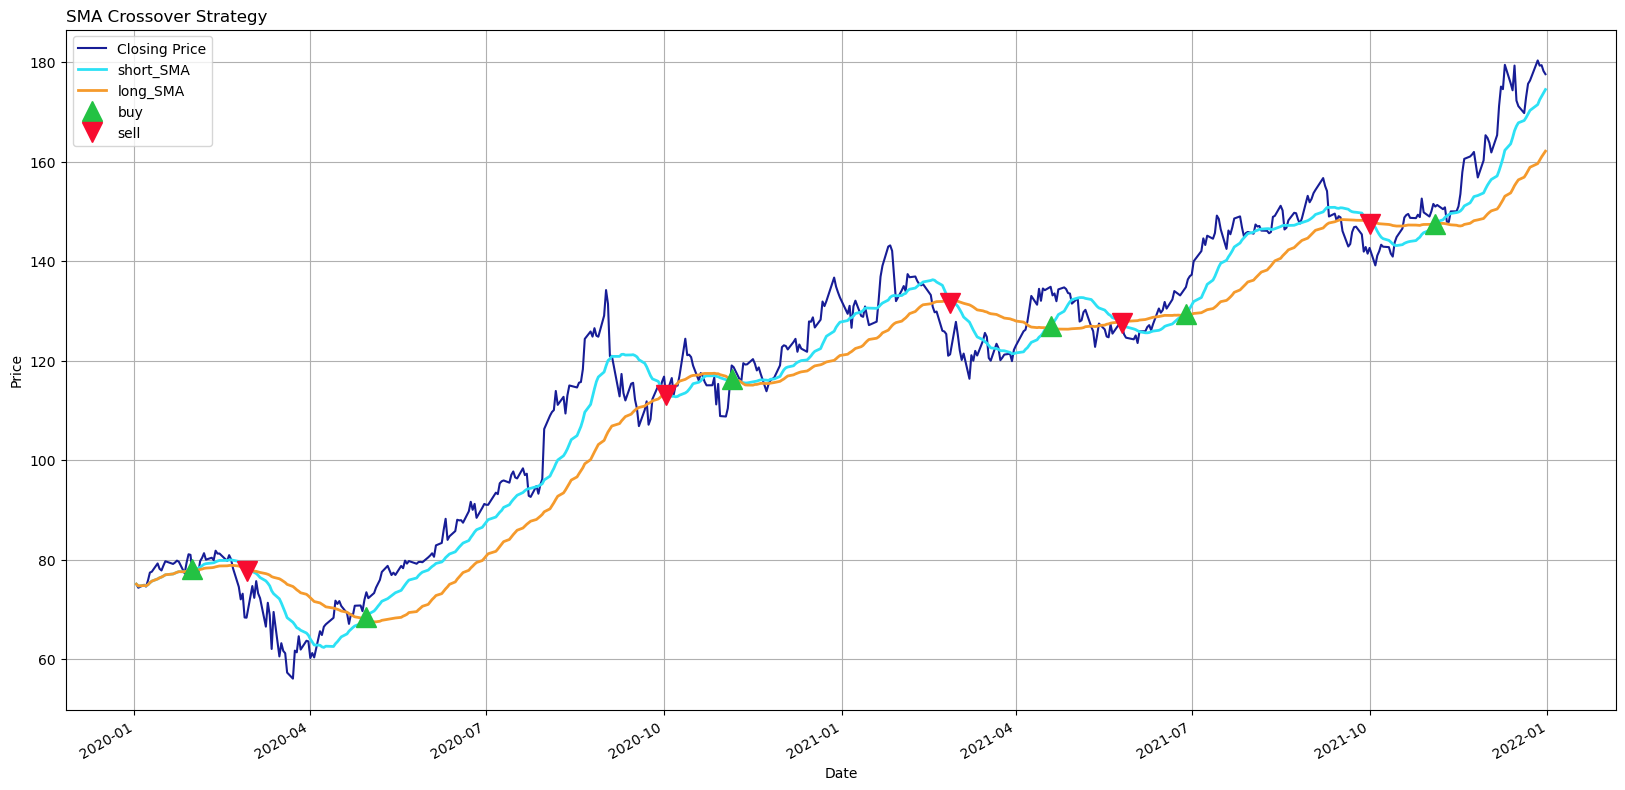

In [31]:
# Initialising the plot figure
fig_SMA = plt.figure(figsize = (20,10))
ax1 = fig_SMA.add_subplot(ylabel='Price')

# Plotting the closing price
stock_data['Close'].plot(color = '#171d96', label = 'Closing Price')

# Plotting the short and long simple moving averages
signal[['short_SMA']].plot(ax=ax1, color='#2ce1f5', lw=2.)
signal[['long_SMA']].plot(ax=ax1, color='#f59a2c', lw=2.)

# Plotting the buy signals
plt.plot(signal.loc[signal.orders_SMA == 1.0].index, 
         signal.short_SMA[signal.orders_SMA == 1.0],
         '^', markersize=15, color='#23c243', label = 'buy')
       
# Plotting the sell signals
plt.plot(signal.loc[signal.orders_SMA == -1.0].index, 
           signal.short_SMA[signal.orders_SMA == -1.0],
          'v', markersize=15, color='#f70c30', label = 'sell')

plt.legend()
plt.title("SMA Crossover Strategy", loc = 'left')
plt.grid()
plt.show()

The 'SMA Crossover Strategy' figure shows the best times to buy and sell during the given time period.

### Exponential Moving Average

Exponential moving average is a statistical approach used to analyse time series data in financial markets. It is a modified version of a simple moving average and a popular trend following approach for data processing. The exponential moving average is also known as the exponentially weighted moving average.

Unlike SMA, EMA considers the recent price changes as being more important than past ones. Therefore, the newest price has the most impact on the moving average and the older data has only a minimal impact.

The weighting for each older data point decreases exponentially, never reaching zero. The 
EMA is used to smoothen the fluctuations in the prices to make approximations for reducing 
the influence of temporary variations and noise in the data.

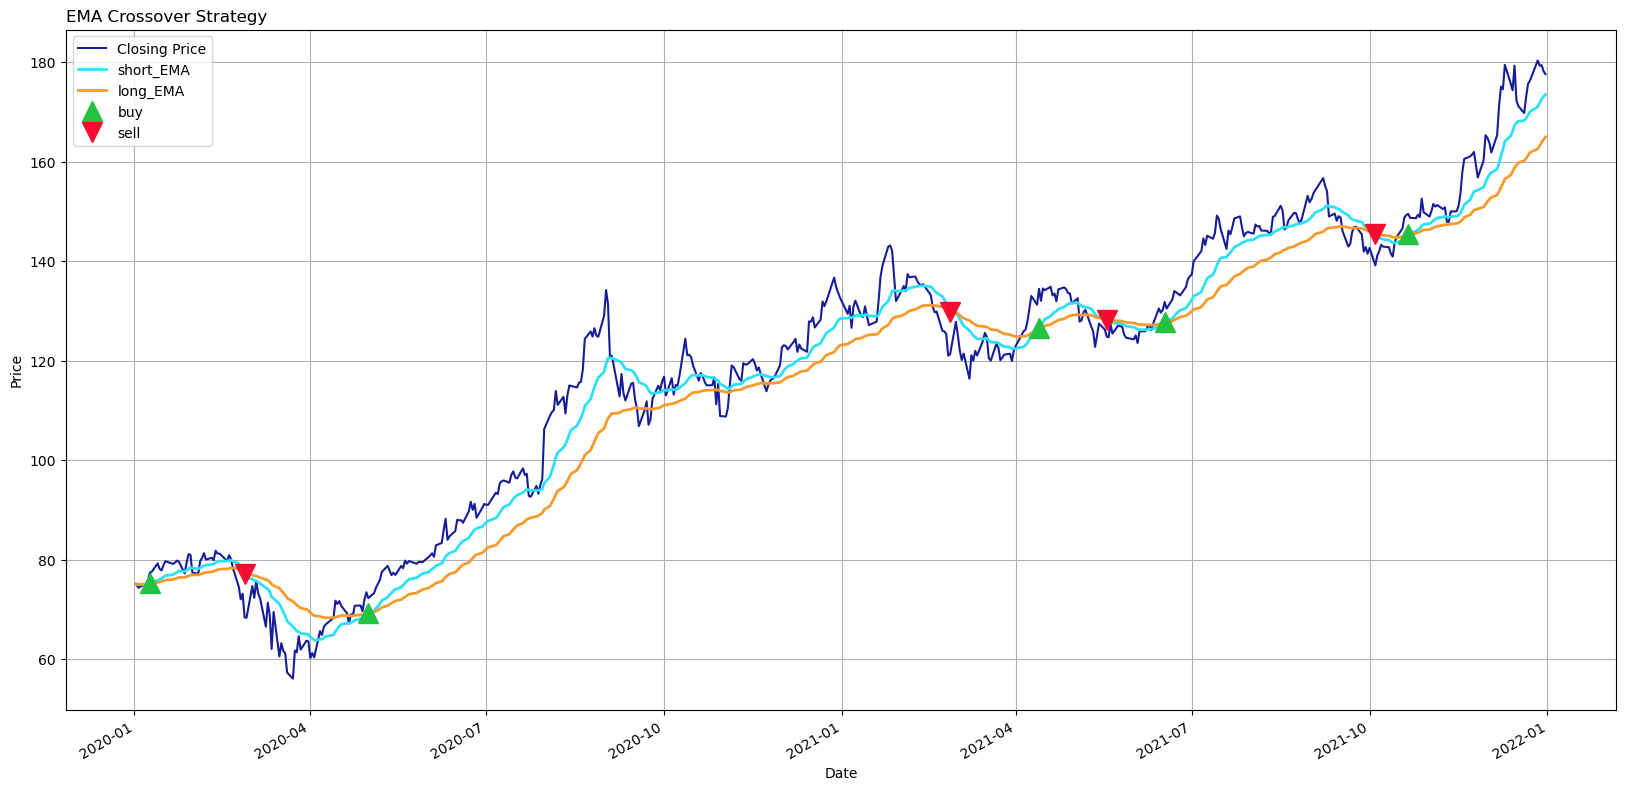

In [32]:
# Initialising the plot figure
fig_EMA = plt.figure(figsize = (20,10))
ax1 = fig_EMA.add_subplot(ylabel='Price')

# Plotting the closing price
stock_data['Close'].plot(color = '#171d96', label = 'Closing Price')

# Plotting the short and long simple moving averages
signal[['short_EMA']].plot(ax=ax1, color='#2ce1f5', lw=2.)
signal[['long_EMA']].plot(ax=ax1, color='#f59a2c', lw=2.)

# Plotting the buy signals
ax1.plot(signal.loc[signal.orders_EMA == 1.0].index, 
        signal.short_EMA[signal.orders_EMA == 1.0],
         '^', markersize=15, color='#23c243', label = 'buy')
         
# Plotting the sell signals
ax1.plot(signal.loc[signal.orders_EMA == -1.0].index, 
         signal.short_EMA[signal.orders_EMA == -1.0],
         'v', markersize=15, color='#f70c30', label = 'sell')

plt.legend()
plt.title("EMA Crossover Strategy", loc = 'left')
plt.grid()
plt.show()

The 'EMA Crossover Strategy' figure also shows the best times to buy and sell during the given time period.

### Example Portfolio

Two example portfolios are created; one with 20-50 SMA Crossover and another with 20-50 EMA Crossover. Both Portfolios have 10000 units to start with, after buying and selling the values of the portfolios are updated.

In [33]:
# Setting the initial capital
initial_capital_S= float(10000.0)
initial_capital_E= float(10000.0)

# Creating two DataFrames 'orders_S' and 'orders_E'
orders_S = pd.DataFrame(index=signal.index).fillna(0.0)
orders_E = pd.DataFrame(index=signal.index).fillna(0.0)

# Buying 100 shares
orders_S['AAPL'] = 100*signal['indicator_SMA']   
orders_E['AAPL'] = 100*signal['indicator_EMA']

# Initialising the portfolios   
portfolio_S = orders_S.multiply(stock_data['Adj Close'], axis=0)
portfolio_E = orders_E.multiply(stock_data['Adj Close'], axis=0)

# The difference in shares owned 
pos_diff_S = orders_S.diff()
pos_diff_E = orders_E.diff()

# Adding 'Holdings' to portfolios
portfolio_S['holdings'] = (orders_S.multiply(stock_data['Adj Close'], axis=0)).sum(axis=1)
portfolio_E['holdings'] = (orders_E.multiply(stock_data['Adj Close'], axis=0)).sum(axis=1)

# Adding 'cash' to portfolios
portfolio_S['cash'] = initial_capital_S - (pos_diff_S.multiply(stock_data['Adj Close'], axis=0)).sum(axis=1).cumsum() 
portfolio_E['cash'] = initial_capital_E - (pos_diff_E.multiply(stock_data['Adj Close'], axis=0)).sum(axis=1).cumsum()

# Adding 'total' to portfolios
portfolio_S['total'] = portfolio_S['cash'] + portfolio_S['holdings']
portfolio_E['total'] = portfolio_E['cash'] + portfolio_E['holdings']

# Adding 'returns' to portfolios
portfolio_S['returns'] = portfolio_S['total'].pct_change(1)
portfolio_E['returns'] = portfolio_E['total'].pct_change(1)

# Creating signals
signal['orders_SMA'] = signal['indicator_SMA'].diff()
signal['orders_EMA'] = signal['indicator_EMA'].diff()

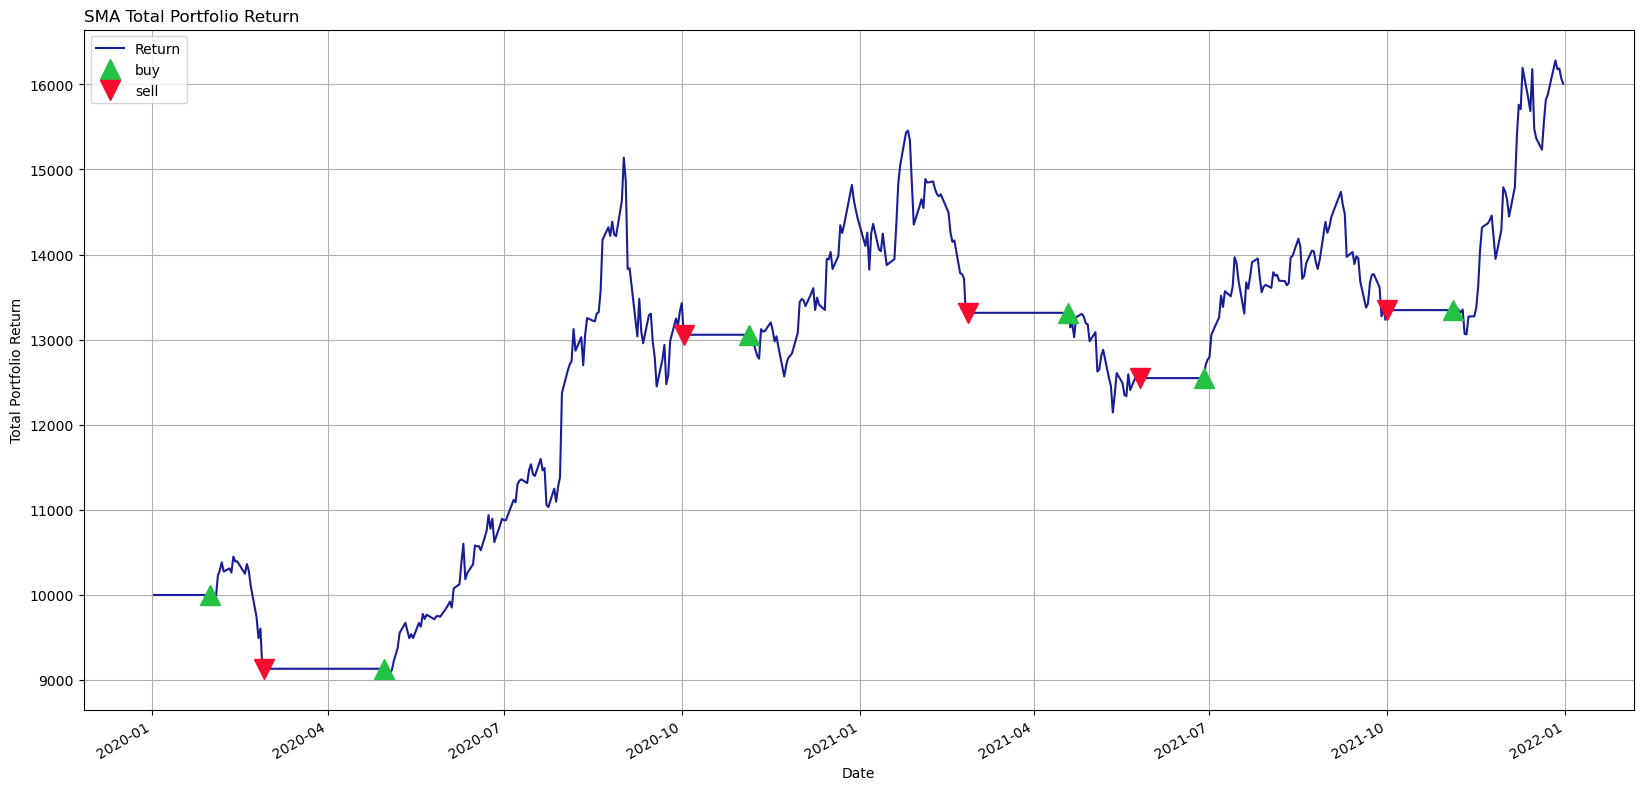

Initial value:
              total
Date               
2020-01-02  10000.0

 Latest Value:
                    total
Date                    
2021-12-31  16006.893158



In [34]:
# Initialising the plot figure
fig_portfolio_S = plt.figure(figsize = (20,10))
ax2 = fig_portfolio_S.add_subplot(ylabel='Total Portfolio Return', )

# Plotting the equity curve
portfolio_S['total'].plot(label = 'Return', color = '#171d96')

# Plotting the buy signals
ax2.plot(portfolio_S.loc[signal.orders_SMA == 1.0].index, 
         portfolio_S.total[signal.orders_SMA == 1.0],
         '^', markersize=15, color='#23c243', label = 'buy')

# Plotting the sell signals
ax2.plot(portfolio_S.loc[signal.orders_SMA == -1.0].index, 
         portfolio_S.total[signal.orders_SMA == -1.0],
         'v', markersize=15, color='#f70c30', label = 'sell')

plt.legend()
plt.title('SMA Total Portfolio Return', loc = 'left')
plt.grid()
plt.show()

sma_portfolio_initial_value = portfolio_S[['total']].head(1)
sma_portfolio_last_value = portfolio_S[['total']].tail(1)
print(f"Initial value:\n{sma_portfolio_initial_value}\n\n Latest Value:\n {sma_portfolio_last_value}\n")

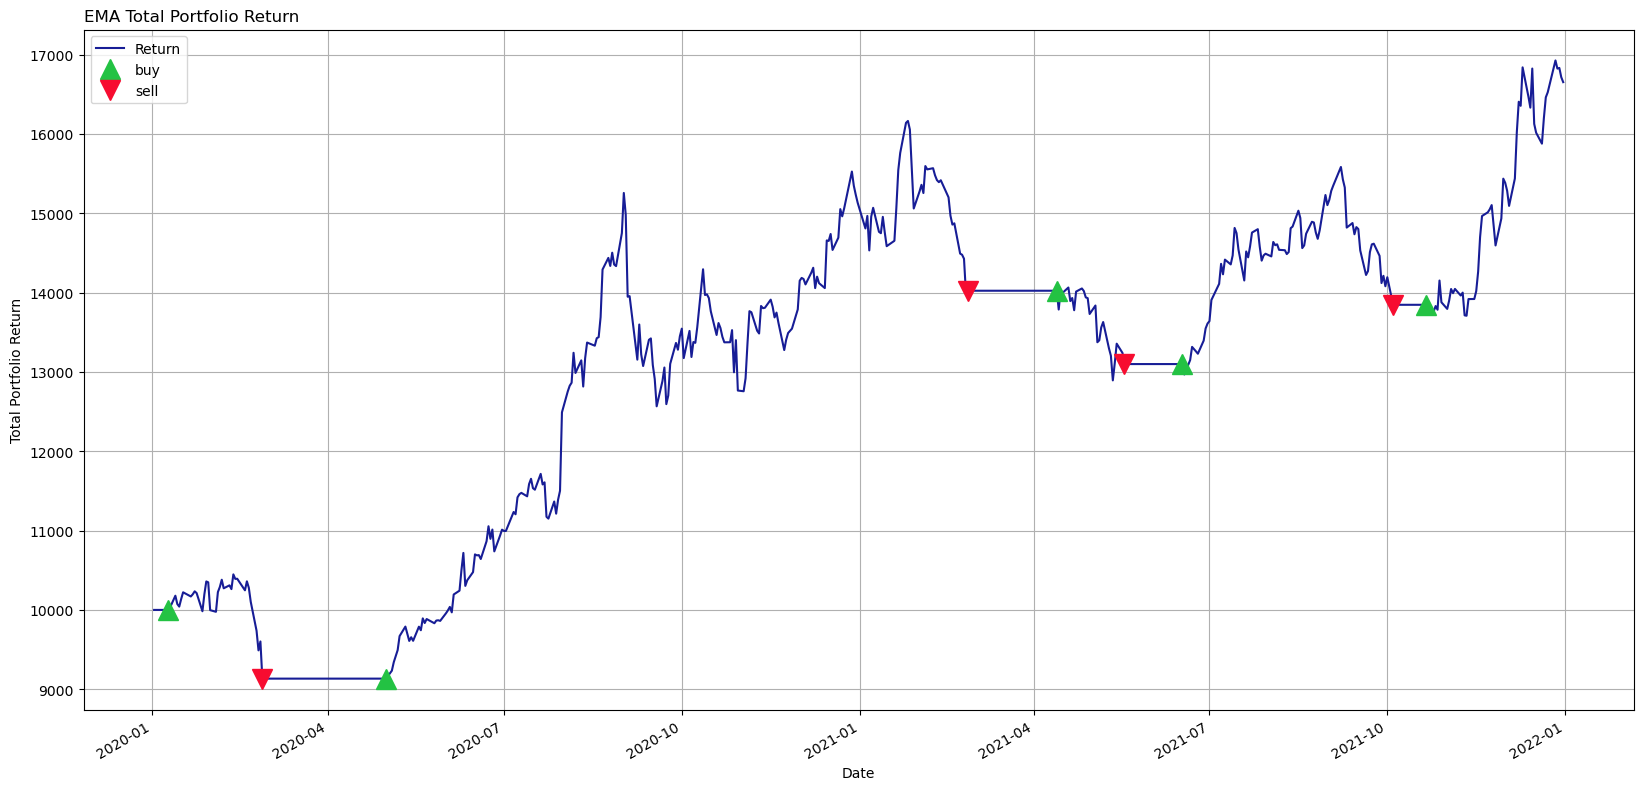

Initial value:
              total
Date               
2020-01-02  10000.0

 Latest Value:
                   total
Date                   
2021-12-31  16652.15683



In [35]:
# Initialising the plot figure
fig_portfolio_E = plt.figure(figsize = (20,10))
ax3 = fig_portfolio_E.add_subplot(ylabel='Total Portfolio Return')

# Plotting the equity curve
portfolio_E['total'].plot(label = 'Return', color = '#171d96')

# Plotting the buy signals
ax3.plot(portfolio_E.loc[signal.orders_EMA == 1.0].index, 
         portfolio_E.total[signal.orders_EMA == 1.0],
         '^', markersize=15, color='#23c243', label = 'buy')

# Plotting the sell signals
ax3.plot(portfolio_E.loc[signal.orders_EMA == -1.0].index, 
         portfolio_E.total[signal.orders_EMA == -1.0],
         'v', markersize=15, color='#f70c30', label = 'sell')

plt.legend()
plt.title('EMA Total Portfolio Return', loc = 'left')
plt.grid()
plt.show()

ema_portfolio_initial_value = portfolio_E[['total']].head(1)
ema_portfolio_last_value = portfolio_E[['total']].tail(1)
print(f"Initial value:\n{ema_portfolio_initial_value}\n\n Latest Value:\n {ema_portfolio_last_value}\n")

### Portfolio Results

In [36]:
print(f"SMA portfolio value end of 2021: \n{sma_portfolio_last_value}\n")

print(f"EMA portfolio value end of 2021: \n{ema_portfolio_last_value}\n")

SMA portfolio value end of 2021: 
                   total
Date                    
2021-12-31  16006.893158

EMA portfolio value end of 2021: 
                  total
Date                   
2021-12-31  16652.15683



Creating a portfolio using the 20-50 day EMA (Exponential Moving Avarage) Crossover is more profitable than the 20-50 day SMA (Simple Moving Average) Crossover. There are other strategies that can be experimented for a more optimal portfolio management. 

Further work could be adding more trading strategies as well as adding price forecasting techniques such as genetic algorithms, ANNs and SVMs. Then the system could be embedded into an application with a user interface so individuals could test different
strategies and see how they work.